In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 8)

# style
# plt.style.use('fivethirtyeight')
plt.style.use("ggplot")

In [2]:
diamonds = pd.read_csv("diamonds.csv")
diamonds

,Carat Weight,Cut,Color,Clarity,Polish,Symmetry,Report,Price
0,1.10,Ideal,H,SI1,VG,EX,GIA,5169
1,0.83,Ideal,H,VS1,ID,ID,AGSL,3470
2,0.85,Ideal,H,SI1,EX,EX,GIA,3183
3,0.91,Ideal,E,SI1,VG,VG,GIA,4370
4,0.83,Ideal,G,SI1,EX,EX,GIA,3171
...,...,...,...,...,...,...,...,...
5995,1.03,Ideal,D,SI1,EX,EX,GIA,6250
5996,1.00,Very Good,D,SI1,VG,VG,GIA,5328
5997,1.02,Ideal,D,SI1,EX,EX,GIA,6157
5998,1.27,Signature-Ideal,G,VS1,EX,EX,GIA,11206


In [3]:
diamonds["Ratio"] =diamonds["Price"]/diamonds["Carat Weight"]
diamonds

,Carat Weight,Cut,Color,Clarity,Polish,Symmetry,Report,Price,Ratio
0,1.10,Ideal,H,SI1,VG,EX,GIA,5169,4699.090909
1,0.83,Ideal,H,VS1,ID,ID,AGSL,3470,4180.722892
2,0.85,Ideal,H,SI1,EX,EX,GIA,3183,3744.705882
3,0.91,Ideal,E,SI1,VG,VG,GIA,4370,4802.197802
4,0.83,Ideal,G,SI1,EX,EX,GIA,3171,3820.481928
...,...,...,...,...,...,...,...,...,...
5995,1.03,Ideal,D,SI1,EX,EX,GIA,6250,6067.961165
5996,1.00,Very Good,D,SI1,VG,VG,GIA,5328,5328.000000
5997,1.02,Ideal,D,SI1,EX,EX,GIA,6157,6036.274510
5998,1.27,Signature-Ideal,G,VS1,EX,EX,GIA,11206,8823.622047


In [4]:
diamonds_ratio_aver = np.average(diamonds["Ratio"])
diamonds_ratio_sd = np.std(diamonds["Ratio"])

print(f"Diamonds average ratio: {diamonds_ratio_aver}.")
print(f"Standard deviation:     {diamonds_ratio_sd}.")

Diamonds average ratio: 7821.411595285629.
Standard deviation:     3905.114098781733.


In [5]:
sample_size = 100
sample = diamonds.sample(n=100,replace=False,random_state=2)
sample

,Carat Weight,Cut,Color,Clarity,Polish,Symmetry,Report,Price,Ratio
1637,1.04,Ideal,I,IF,VG,VG,GIA,6155,5918.269231
1381,1.21,Very Good,F,VS2,G,VG,GIA,8353,6903.305785
2714,2.02,Ideal,F,VS1,EX,EX,GIA,32176,15928.712871
2556,0.90,Very Good,H,VS2,VG,EX,GIA,4178,4642.222222
586,1.60,Ideal,G,VVS2,VG,EX,GIA,16575,10359.375000
...,...,...,...,...,...,...,...,...,...
1389,0.91,Good,H,SI1,G,G,GIA,3855,4236.263736
584,1.04,Ideal,H,VVS2,EX,EX,GIA,6990,6721.153846
1746,1.22,Ideal,H,VS1,VG,EX,GIA,7418,6080.327869
1019,0.82,Ideal,D,SI1,EX,EX,GIA,4135,5042.682927


In [6]:
def ratio_aver(df):
    
    x=np.average(df["Ratio"])
    return x

ratio_aver(sample)

7913.000695480746

In [7]:
# number of resamples
num_resamples = 5000

# initialize averages with 0's
averages =np.zeros(num_resamples,dtype=float)

for i in np.arange(num_resamples):
    # resample once
    resample = sample.sample(frac=1,replace=True).reset_index(drop=True)
    x=ratio_aver(resample)
    
    # add ratio average to averages array
    averages[i]=x

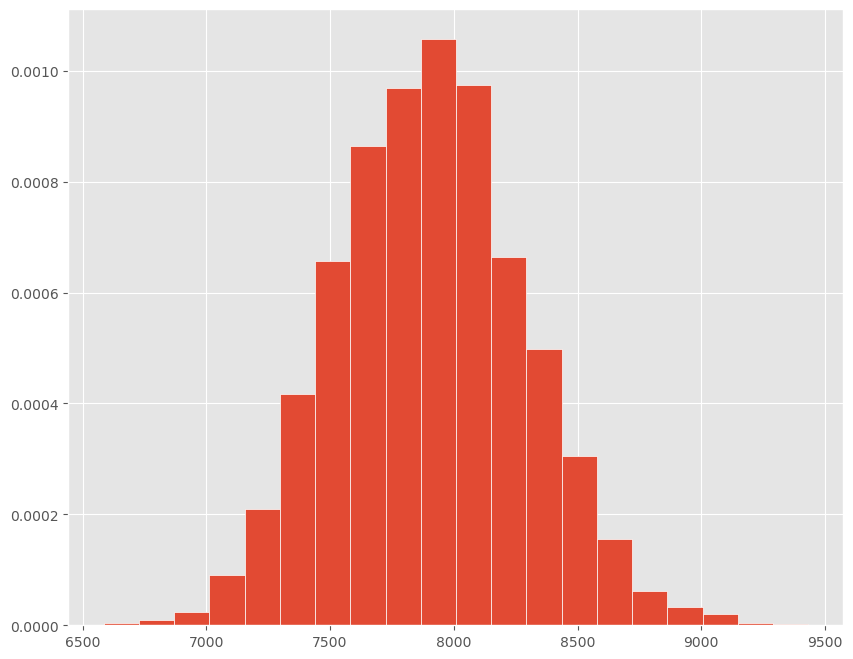

In [8]:
plt.hist(averages, bins=20, density=True, ec="white")

plt.show()

In [11]:
def confidence_interval(percent):
    # percentile for the left boundary
    left_perc = (100-percent)/2
    
    # percentile for the right boundary
    right_perc = left_perc + percent

    # left boundary for the confidence interval
    left = np.percentile(averages,left_perc)
    
    # right boundary for the confidence interval
    right = np.percentile(averages,right_perc)

    return [left, right]

In [12]:
ci_boundaries = confidence_interval(80)
ci_boundaries

[7425.18870562414, 8389.955811323518]

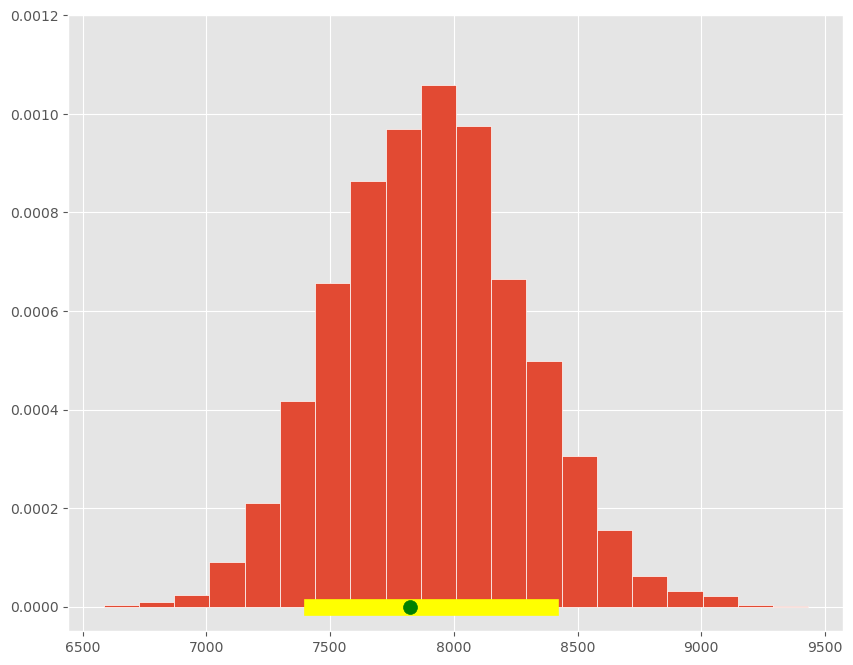

In [13]:
plt.hist(averages, bins=20, density=True, ec="white", zorder=1)
plt.plot(ci_boundaries, [0, 0], color="yellow", lw=12, zorder=2)
plt.scatter([diamonds_ratio_aver], [0], color="green", s=100, zorder=3)

plt.ylim(-0.00005, 0.0012)

plt.show()

In [14]:
# median of the array averages
averages_median = np.percentile(averages,50)

if diamonds_ratio_aver <= averages_median:
    # the real value is on the left side of the graph
    p_value=np.count_nonzero(averages<=diamonds_ratio_aver)/len(averages)
else:
    # the real value is on the right side of the graph
    p_value=np.count_nonzero(averages>=diamonds_ratio_aver)/len(averages)

p_value

0.4202

In [15]:
# percentage for the smallest confidence interval containing diamons_ratio_average
confidence = (1-(p_value*2))*100
confidence

15.959999999999997

In [16]:
def standard_units(array):
    "Convert any array of numbers to standard units."
    return (array - np.mean(array)) / np.std(array)


def regression_data(df, label_x, label_y):
    """
    Given a data frame and columns labels for the x and y columns,
    computes correlation, slope, intercept, and prediction function.
    """

    r = (standard_units(df[label_x]) * standard_units(df[label_y])).mean()

    slope = r * df[label_y].std() / df[label_x].std()

    intercept = df[label_y].mean() - slope * df[label_x].mean()

    prediction_fct = lambda x: slope * x + intercept

    return r, slope, intercept, prediction_fct


def residual(df, x_label, y_label, prediction_fct=None):
    """
    Computers the residual between observed and estimated values.
    """
    if prediction_fct is None:
        prediction_fct = regression_data(df, x_label, y_label)[-1]

    return df[y_label] - prediction_fct(df[x_label])


def residual_plot(df, x_label, y_label):
    """
    Residual plot of colums labeled x_label and y_label from
    data frame df.
    """
    # we use different colors from scatter graphs
    cmap = plt.get_cmap("tab10")

    x_array = df[x_label]
    t = pd.DataFrame({x_label: x_array, "residuals": residual(df, x_label, y_label)})
    t.plot(x_label, "residuals", kind="scatter", color=cmap(2))
    xlims = np.array([x_array.min(), x_array.max()])
    plt.plot(xlims, np.array([0, 0]), lw=4, color=cmap(4))
    plt.title("Residual Plot")


def mult_scatter(df):
    """
    Given a data frame, draws the scatter graphs with the
    first column as x, and every other column as y.
    """
    # column labels
    cols = df.columns

    # colors
    cmap = plt.get_cmap("tab10")

    # initialize plot
    fig, ax = plt.subplots()

    # plot graphs
    for i, col in enumerate(cols[1:]):
        df.plot(0, i + 1, kind="scatter", label=cols[i + 1], color=cmap(i), ax=ax)

    # set the x-label
    plt.xlabel(cols[0])
    plt.ylabel("")


def scatter_and_fit(df):
    """
    Plot multiple scatter plots and the fitted line for the first.
    """
    # column labels
    cols = df.columns
    n_cols = len(cols)

    # colors
    cmap = plt.get_cmap("tab10")

    # initialize plot
    fig, ax = plt.subplots()

    # plot graphs
    for i, col in enumerate(cols[1:]):
        df.plot(0, i + 1, kind="scatter", label=cols[i + 1], color=cmap(i), ax=ax)

    # if only two columns
    if n_cols == 2:
        plt.ylabel(cols[1])
        ax.get_legend().remove()
    else:
        plt.ylabel("")

    # fitted line
    prediction_fct = regression_data(df, cols[0], cols[1])[-1]
    xs = np.array([df[cols[0]].min(), df[cols[0]].max()])
    ys = prediction_fct(xs)
    plt.plot(xs, ys, color=cmap(n_cols + 1), lw=3)

    # set the x-label
    plt.xlabel(cols[0])

In [17]:
full_df = pd.read_csv("female_literacy_fertility.csv")
full_df

,Country,Continent,female literacy,fertility,population
0,Chine,ASI,90.5,1.769,"1,324,655,000"
1,Inde,ASI,50.8,2.682,"1,139,964,932"
2,USA,NAM,99.0,2.077,"304,060,000"
3,Indonésie,ASI,88.8,2.132,"227,345,082"
4,Brésil,LAT,90.2,1.827,"191,971,506"
...,...,...,...,...,...
157,Vanuatu,OCE,79.5,3.883,"233,866"
158,Samoa,OCE,98.5,3.852,"178,869"
159,Sao Tomé-et-Principe,AF,83.3,3.718,"160,174"
160,Aruba,LAT,98.0,1.732,"105,455"


In [18]:
female_literacy_fetitlity = full_df[["female literacy", "fertility"]]

female_literacy_fetitlity

,female literacy,fertility
0,90.5,1.769
1,50.8,2.682
2,99.0,2.077
3,88.8,2.132
4,90.2,1.827
...,...,...
157,79.5,3.883
158,98.5,3.852
159,83.3,3.718
160,98.0,1.732


In [19]:
flf_r, flf_slope, flf_intercept, flf_pred_fct = regression_data(female_literacy_fetitlity,"female literacy","fertility")

print(f"Correlation:  {flf_r:.2f}")
print(f"Slope:        {flf_slope:.2f}")
print(f"Intercept:    {flf_intercept:.2f}")

Correlation:  -0.80
Slope:        -0.05
Intercept:    6.87


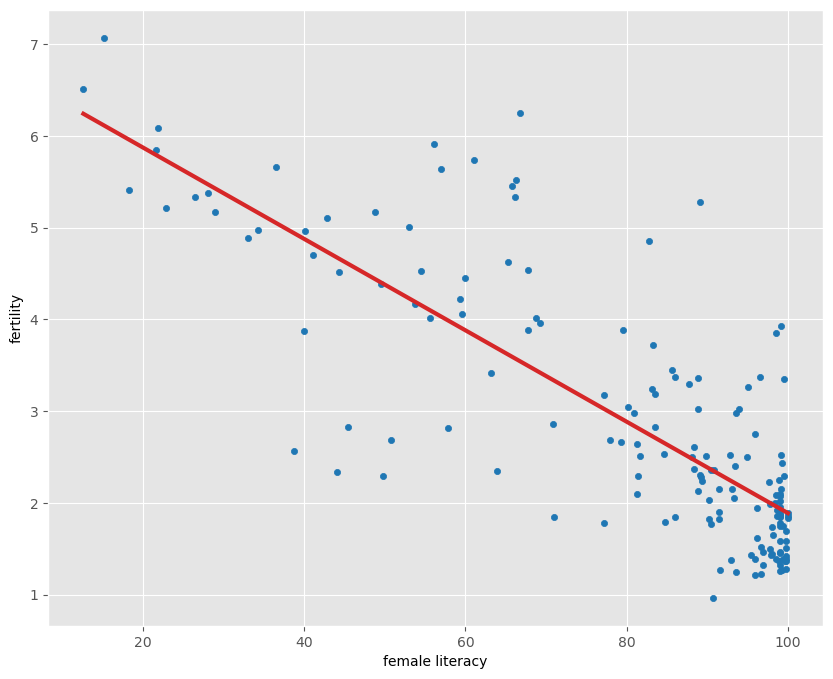

In [20]:
scatter_and_fit(female_literacy_fetitlity)

In [21]:
def split_df(df, first_prop):
    """
    Splits df randomly in two: one with proportion first_prop, and 
    the other containing the rest.
    """
    
    df1 = df.sample(frac=first_prop)
    
    df2 = df.drop(df1.index)
    
    return df1.reset_index(drop=True), df2.reset_index(drop=True)

In [22]:
train_df, test_df = split_df(female_literacy_fetitlity, 0.7)

In [23]:
train_r, train_slope, train_intercept, train_pred_fct = regression_data(train_df,"female literacy","fertility")

print(f"Correlation:  {train_r:.2f}")
print(f"Slope:        {train_slope:.2f}")
print(f"Intercept:    {train_intercept:.2f}")

Correlation:  -0.80
Slope:        -0.05
Intercept:    6.52


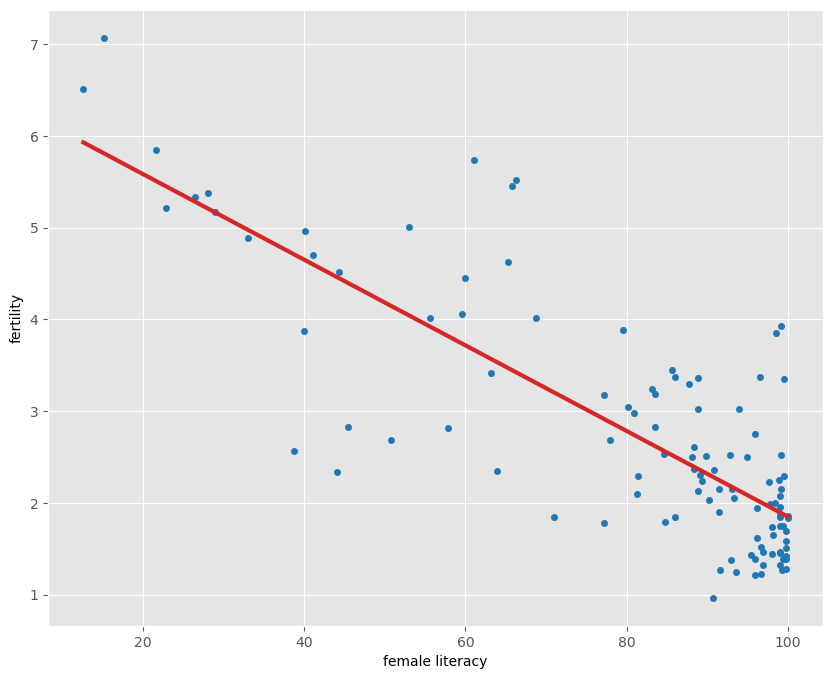

In [24]:
scatter_and_fit(train_df)

In [25]:
print(f"Correlation difference:  {flf_r - train_r:.2f}")
print(f"Slope difference:        {flf_slope - train_slope:.2f}")
print(f"Intercept difference:    {flf_intercept - train_intercept:.2f}")

Correlation difference:  -0.00
Slope difference:        -0.00
Intercept difference:    0.35


In [26]:
# set test_df_pred as a copy of test_df
test_df_pred = test_df.copy()

# add Prediceted column
test_df_pred["Predicted"] = train_pred_fct(test_df_pred["female literacy"])

test_df_pred.head(10)

,female literacy,fertility,Predicted
0,90.5,1.769,2.292658
1,90.2,1.827,2.306658
2,49.8,2.288,4.192029
3,48.8,5.173,4.238696
4,99.0,1.262,1.895984
5,91.5,1.822,2.245991
6,56.1,5.908,3.898023
7,98.5,1.390,1.919317
8,89.2,2.281,2.353326
9,99.6,1.361,1.867983


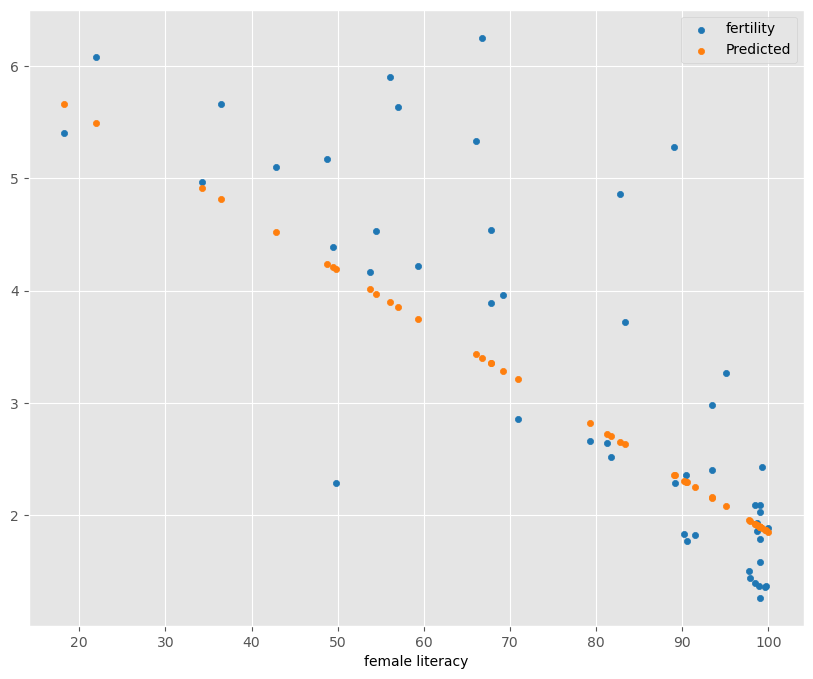

In [27]:
mult_scatter(test_df_pred)

In [28]:
test_df_pred["Error"] =test_df_pred["Predicted"]-test_df_pred["fertility"]
test_df_pred.head(5)

,female literacy,fertility,Predicted,Error
0,90.5,1.769,2.292658,0.523658
1,90.2,1.827,2.306658,0.479658
2,49.8,2.288,4.192029,1.904029
3,48.8,5.173,4.238696,-0.934304
4,99.0,1.262,1.895984,0.633984


In [29]:
test_rmse = (test_df_pred["Error"] ** 2).mean() ** .5
test_rmse

0.9871846171143617

In [30]:
train_df

,female literacy,fertility
0,91.6,1.263
1,90.8,2.362
2,99.0,1.324
3,99.2,2.153
4,99.8,1.426
...,...,...
108,81.4,2.295
109,55.6,4.010
110,95.4,1.436
111,93.9,3.026


In [31]:
# copy train_df
train_df_pred =  train_df.copy()

# add predictions
train_df_pred["Prediction"] = train_pred_fct(train_df_pred["female literacy"])

# add error
train_df_pred["Error"] = train_df_pred["Prediction"]-train_df_pred["fertility"]

# rmse
train_rmse = (train_df_pred["Error"] ** 2).mean() ** .5

train_rmse

0.7909274055305906

In [32]:
test_rmse - train_rmse

0.19625721158377107